<a href="https://colab.research.google.com/github/s1310087/PAMI/blob/main/ex13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from PAMI.frequentPattern.basic.FPGrowth import FPGrowth

df = pd.read_csv("data.csv")

df.fillna(0, inplace=True)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].applymap(lambda x: 0 if x >= 100 else x)
df.drop(columns=['obsdate'], inplace=True)

/tmp/ipython-input-14-4004101962.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [15]:
!pip install -U PAMI

In [17]:
from PAMI.extras.convert.DF2DB import DF2DB

db = DF2DB(inputDF=df, DFtype='dense')
db.convert2TransactionalDatabase(oFile='PM24HeavyPollutionRecordingSensors.csv', condition='>=', thresholdValue=15)

fpg = FPGrowth(iFile="PM24HeavyPollutionRecordingSensors.csv",minSup=0.2)
fpg.startMine()
patterns = fpg.getPatterns()

with open("frequentPatterns.txt", "w") as f:
    for itemset, support in patterns.items():
        f.write(f"{itemset}:{support}\n")

/tmp/ipython-input-17-642702443.py:7: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'mine()' for mining process. Starting from January 2025, 'mine()' will be completely terminated.)



Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [22]:
raw_patterns = fpg.getPatterns()
for items, support in raw_patterns.items():
    print("Items:", items, "Support:", support)

import plotly.express as px

patterns = []
with open("frequentPatterns.txt", "r") as f:
    for line in f:
        try:
            items, support = line.strip().split(":")
            itemset = tuple(items.strip("()").replace("'", "").split(", "))
            support = int(support)
            patterns.append((itemset, support))
        except:
            continue

longest_pattern = max(patterns, key=lambda x: len(x[0]))[0]
from google.colab import files


uploaded = files.upload()

info_df = pd.read_csv("stationInfo.csv")
info_df['stationId'] = info_df['stationId'].astype(str)

info_df[['lon', 'lat']] = info_df['Location'].str.extract(r'Point\(([^ ]+) ([^ ]+)\)').astype(float)
longest_pattern = tuple([item.replace("Point(", "").replace(")", "").strip() for item in longest_pattern])

map_df = info_df[info_df['stationId'].isin(longest_pattern)]

fig = px.scatter_mapbox(
    map_df,
    lat="lat",
    lon="lon",
    text="stationId",
    zoom=5,
    height=500
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Longest Frequent Pattern (High Pollution Exposure Sensors)")
fig.show()



Items: ('Point(27146010)',) Support: 144
Items: ('Point(34211200)',) Support: 144
Items: ('Point(35208010)',) Support: 144
Items: ('Point(14209020)',) Support: 144
Items: ('Point(16201021)',) Support: 144
Items: ('Point(10210010)',) Support: 144
Items: ('Point(29209010)',) Support: 144
Items: ('Point(42314020)',) Support: 144
Items: ('Point(38201080)',) Support: 145
Items: ('Point(34201020)',) Support: 145
Items: ('Point(20217020)',) Support: 145
Items: ('Point(33202090)',) Support: 146
Items: ('Point(42209010)',) Support: 146
Items: ('Point(45203520)',) Support: 146
Items: ('Point(23110040)',) Support: 146
Items: ('Point(18201540)',) Support: 146
Items: ('Point(41202200)',) Support: 146
Items: ('Point(32203040)',) Support: 147
Items: ('Point(18361010)',) Support: 148
Items: ('Point(23112020)',) Support: 148
Items: ('Point(40222010)',) Support: 148
Items: ('Point(11212520)',) Support: 148
Items: ('Point(11209010)',) Support: 148
Items: ('Point(25201510)',) Support: 148
Items: ('Point(2

Saving stationInfo.csv to stationInfo (11).csv


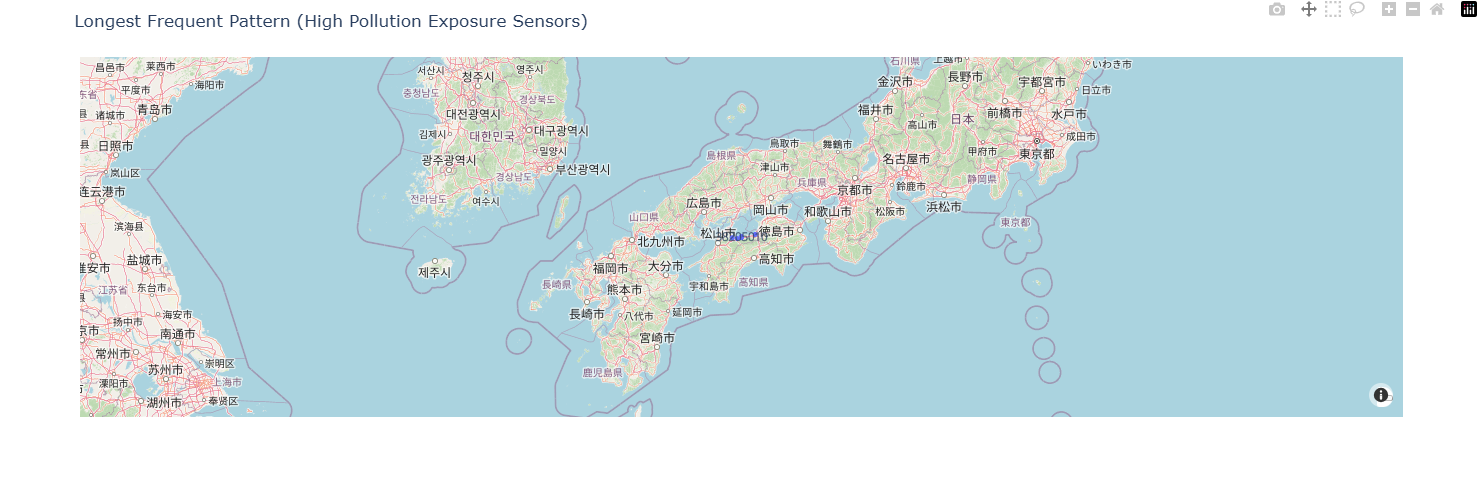